<a href="https://colab.research.google.com/github/achrefdhibi/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


In [75]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')


In [48]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
data.shape


(918, 12)

In [51]:
data.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [52]:
data.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [53]:
data.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [76]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=4)


In [77]:
# Define the features and target variables
x_train = train.drop(columns=["HeartDisease"])
y_train = train["HeartDisease"]
x_test = test.drop(columns=["HeartDisease"])
y_test = test["HeartDisease"]


In [78]:
# Identify and encode categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
x_train_encoded = pd.get_dummies(x_train, columns=categorical_columns)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_columns)


In [79]:
# Create a Bagging of Random Forest Classifiers model
n_estimators_rf = 10  # Vous pouvez ajuster ce nombre
bagging_rf_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=4), n_estimators=n_estimators_rf, random_state=4)



In [80]:
# Train the Bagging of Random Forest model
bagging_rf_model.fit(x_train_encoded, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=4),
                  random_state=4)

In [81]:
# Predict with the Bagging of Random Forest model
y_pred_bagging_rf = bagging_rf_model.predict(x_test_encoded)


In [82]:
# Evaluate the Bagging of Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
classification_report_bagging_rf = classification_report(y_test, y_pred_bagging_rf)
roc_auc_bagging_rf = roc_auc_score(y_test, bagging_rf_model.predict_proba(x_test_encoded)[:, 1])


In [83]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=4)


In [84]:
# Train the Logistic Regression model
logistic_model.fit(x_train_encoded, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [85]:
# Predict with the Logistic Regression model
y_pred_logistic = logistic_model.predict(x_test_encoded)


In [86]:
# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(x_test_encoded)[:, 1])


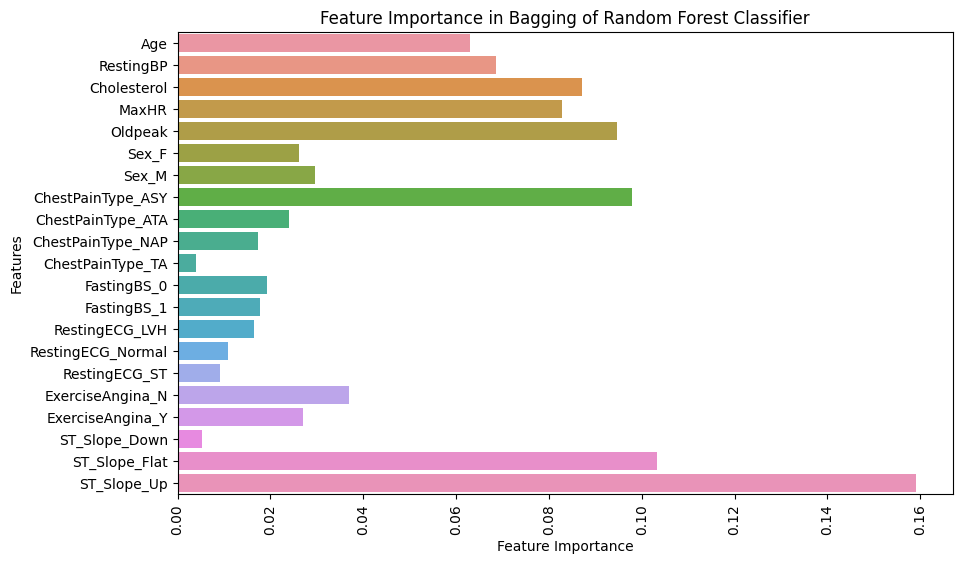

In [87]:
# Visualize feature importances (Bagging of Random Forest)
base_rf_model = bagging_rf_model.estimators_[0]  # Sélectionnez un modèle de base du Bagging
feature_importances_rf = base_rf_model.feature_importances_
feature_names_rf = x_train_encoded.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=feature_names_rf)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Bagging of Random Forest Classifier")
plt.xticks(rotation=90)
plt.show()


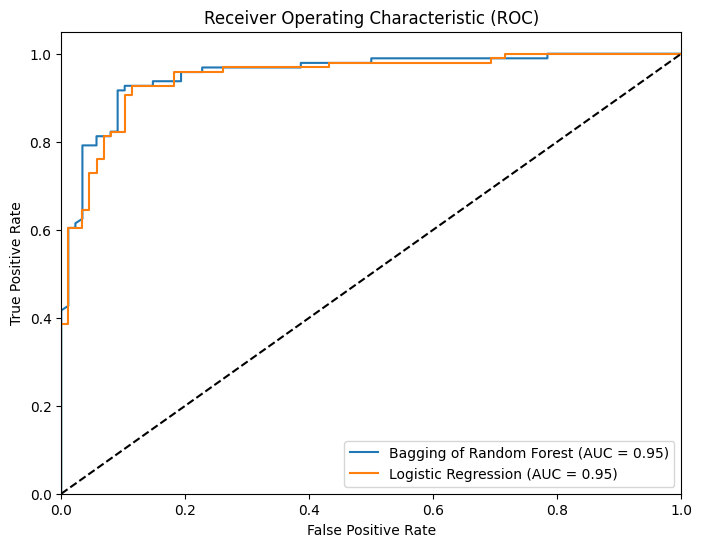

In [88]:
# Display ROC curves
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, bagging_rf_model.predict_proba(x_test_encoded)[:, 1])
plt.plot(fpr, tpr, label='Bagging of Random Forest (AUC = {:.2f})'.format(roc_auc_bagging_rf))
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(x_test_encoded)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [89]:
# Display results
print("Bagging Random Forest Classifier Results:")
print("Accuracy:", accuracy_bagging_rf)
print("Classification Report:\n", classification_report_bagging_rf)
print("AUC-ROC Score:", roc_auc_bagging_rf)

print("\nLogistic Regression Classifier Results:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", classification_report_logistic)
print("AUC-ROC Score:", roc_auc_logistic)


Bagging Random Forest Classifier Results:
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        88
           1       0.84      0.94      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

AUC-ROC Score: 0.954782196969697

Logistic Regression Classifier Results:
Accuracy: 0.8804347826086957
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        88
           1       0.86      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

AUC-ROC Score: 0.9476799242424242


In [90]:
# Save the models
import joblib


In [91]:
# Save the Bagging of Random Forest model
joblib.dump(bagging_rf_model, 'bagging_rf_model.pkl')


['bagging_rf_model.pkl']

In [92]:
# Save the Logistic Regression model
joblib.dump(logistic_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [93]:
# Load the saved models (example)
loaded_bagging_rf_model = joblib.load('bagging_rf_model.pkl')
loaded_logistic_model = joblib.load('logistic_model.pkl')
